# <font color=green> **AULA PRÁTICA 2**
-----

## Objetivo:
Entendimento e primeiros passos para Leitura dos dados da base LOGGI


## Tópicos:
1.  Ler dados do tipo .json 
2.  Transformar para dataframe
3.  Manipular arquivos
5.  Criação de gráficos
6.  Exercício 

**DADOS LOGGIBUD**

1. **O que é?**

      Conjunto de dados e scripts de benchmark para resolução de problemas de otimização de entregas urbanas

<br>

2. **Onde acessar?**

      * https://github.com/loggi/loggibud

      * https://github.com/loggi/loggibud/blob/master/docs/quickstart.md


OBS: Antes de seguir com as análises, baixe os dados disponibilizado no link. Se precisar de mais instruções, veja o passo-a-passo disponibilizado no *power point*.

## 1 - Importar arquivos

* **Forma 1:**

Em arquivos (a esquerda, no google colab), apertar em *Fazer upload para o armazenamento da sessão*.
> OBS: Essa forma é temporária. Assim, ao abrir novamente o colab ou perder a conexão, o arquivo não estará mais lá e terá que fazer upload novamente.

<br />

* **Forma 2:**

Conectar Drive, assim o google colab terá acesso a sua pasta no drive.

<br />

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 - Explorando os arquivos

In [2]:
# pacote para verificar os arquivos existentes em um determinado caminho
import os    

In [3]:
# diretório onde está a pasta com os dados
diretorio1 = '/content/drive/MyDrive/disciplina modelagem/dados LOGGI/dataset/data'

In [4]:
# quais arquivos temos na pasta?
os.listdir(diretorio1)

['cvrp-instances-1.0', 'delivery-instances-1.0']

In [5]:
# quais os arquivos dentro da pasta cvrp-instance-1.0?
diretorio1_1 = '/content/drive/MyDrive/disciplina modelagem/dados LOGGI/dataset/data/cvrp-instances-1.0'
os.listdir(diretorio1_1)

['train', 'dev']

In [6]:
# quais os arquivos dentro da pasta cvrp-instance-1.0 train?
diretorio1_2 = '/content/drive/MyDrive/disciplina modelagem/dados LOGGI/dataset/data/cvrp-instances-1.0/train'
os.listdir(diretorio1_2)

['rj-0',
 'df-0',
 'pa-1',
 'df-2',
 'rj-1',
 'rj-3',
 'df-1',
 'pa-0',
 'rj-2',
 'rj-5',
 'rj-4']

In [ ]:
# quais os arquivos dentro da pasta cvrp-instance-1.0 train rj-0?
diretorio1_3 = '/content/drive/MyDrive/disciplina modelagem/dados LOGGI/dataset/data/cvrp-instances-1.0/train/rj-0'
os.listdir(diretorio1_3)

### 1.2 - Lendo arquivos cvrp-0-rj-0.*json*

Arquivos formato .json (JavaScript Object Notation)

In [17]:
# Caminho do arquivo cvrp-0-rj-0.json
diretorio2 = '/content/drive/MyDrive/disciplina modelagem/dados LOGGI/dataset/data/cvrp-instances-1.0/train/rj-0/cvrp-0-rj-0.json'

#### 1.2.1 - Tentativa 1 - utilizando o pacote Pandas

Pacote para manipulação e análise de dados.

* Biblioteca fundamental para ciência de dados.
* Oferece estruturas e operações para manipular tabelas (bidimensional) e séries (1-dimensão).
* Construída com base no pacote Numpy.


<br />

**Documentação:**

https://pandas.pydata.org/docs/

https://pandas.pydata.org/docs/pandas.pdf


In [18]:
# Importando o pacote Pandas
import pandas as pd

In [20]:
# Ler arquivo cvrp-0-df-0 - irá dar erro
df = pd.read_json(diretorio2)

ValueError: ignored

#### 1.2.2 - Tentativa 2 - utilizando o pacote json

In [23]:
# Importando pacote json  (https://docs.python.org/3/library/json.html) - pacote para leitura de dados tipo .json
import json

In [ ]:
# carregando e abrindo o arquivo cvrp-0-rj-0.json com o pacote json
data = json.load(open(diretorio2))
data

## 2 - Manipulando o arquivo

É fácil de identificar quais as informações que temos no arquivo aberto?

In [ ]:
data

In [30]:
# retorna o tipo do objeto (lista, array, tupla, dicionário,....)
type(data)

dict

### 2.1 - Entendendo o básico de dicionário



In [34]:
# dicionário {}
dicionario = {}
print(dicionario)
print(f'Formato: {type(dicionario)}')

{}
Formato: <class 'dict'>


In [36]:
# Formato do dicionário
dicionario = {'nome': ['Diego','Rafaela','Joana'], 'idade': [10,20,30],'nota':[6,6,7]}
dicionario

{'idade': [10, 20, 30],
 'nome': ['Diego', 'Rafaela', 'Joana'],
 'nota': [6, 6, 7]}

In [38]:
# Transformando dicionario em tabela utilizando o Pandas
pd.DataFrame(dicionario)

,nome,idade,nota
0,Diego,10,6
1,Rafaela,20,6
2,Joana,30,7


In [39]:
# Chaves do dicionário - como acessamos os termos de um dicionário
dicionario.keys()

dict_keys(['nome', 'idade', 'nota'])

In [49]:
# Acessando a chave 'nome'
dicionario['nome']

['Diego', 'Rafaela', 'Joana']

### 2.2 - Acessando os termos do dicionário data

In [ ]:
# voltando para nosso conjunto data...
data

In [53]:
# relembrando que o tipo do objeto é dicionário
type(data)

dict

In [55]:
# acessando as chaves do conjunto dos dados
data.keys()

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])

In [56]:
# acessando a informação de região
data['region']

'rj-0'

In [58]:
# acessando a informação origem
data['origin']

{'lat': -22.866229814964015, 'lng': -43.09887838388887}

In [59]:
# acessando a informação de capacidade de veículo
data['vehicle_capacity']

180

In [62]:
# Acessando as informações de entregas
data['deliveries']

[{'id': '8f6abd1e06bd7704feac404a445094e1',
  'point': {'lat': -22.863610319183422, 'lng': -43.10803774439438},
  'size': 3},
 {'id': 'e394f05d92650ed1512dabaadc9295d5',
  'point': {'lat': -22.862208238855914, 'lng': -43.08997527513803},
  'size': 8},
 {'id': '40f1c2db50c9697c3c1254f89d007f60',
  'point': {'lat': -22.86352096755535, 'lng': -43.09614479044607},
  'size': 1},
 {'id': '630983abc40e566355d993a11fee0973',
  'point': {'lat': -22.855667794658597, 'lng': -43.094907911605844},
  'size': 6},
 {'id': 'ec64e4ae52e564dddc9bb5f695223a',
  'point': {'lat': -22.86330981243167, 'lng': -43.09954677964522},
  'size': 9},
 {'id': '7ebc7b949f3098be07ad3ea163f4c8ef',
  'point': {'lat': -22.869112144722987, 'lng': -43.10574127171159},
  'size': 8},
 {'id': '84b448d8f8ff4dcefd6f15100bdaed57',
  'point': {'lat': -22.86768847585119, 'lng': -43.10977387847648},
  'size': 4},
 {'id': '3c1c3242fbb7c6d27c5b0cf2a619a5d4',
  'point': {'lat': -22.865657804423492, 'lng': -43.0951854304153},
  'size': 6

De qual forma podemos ler os dados de entrega (*data['deliveries']*) de forma mais amigável?

### 2.3 - Transformando os dados de entrega em tabela com o Pandas

In [ ]:
# Passando os dados de entrega (data['deliveries']) para dataframe - formato de tabela
df_entregas = pd.DataFrame(data['deliveries'])
df_entregas

,id,point,size
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9
...,...,...,...
3723,9a21a59a599a4719f8920050a8e6ba07,"{'lng': -43.04084492888289, 'lat': -22.8078026...",6
3724,23648c94a029ecf717acdac0acb1915e,"{'lng': -43.04066132851633, 'lat': -22.8036078...",9
3725,682f2d1f64f55dad54386d1d03dd2af9,"{'lng': -43.03201355856611, 'lat': -22.8073567...",10
3726,94b4e8fc584e5168956688a4f94d93e3,"{'lng': -43.0283077229614, 'lat': -22.81041288...",5


In [70]:
# lê as primeiras linhas
df_entregas.head()

,id,point,size
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9


In [ ]:
# (linhas, colunas)
df_entregas.shape

(3728, 3)

In [73]:
# colunas do dataframe
df_entregas.columns

Index(['id', 'point', 'size'], dtype='object')

Alguma coluna está com algum formato não muito amigável?

In [75]:
df_entregas['point']

0       {'lng': -43.10803774439438, 'lat': -22.8636103...
1       {'lng': -43.08997527513803, 'lat': -22.8622082...
2       {'lng': -43.09614479044607, 'lat': -22.8635209...
3       {'lng': -43.094907911605844, 'lat': -22.855667...
4       {'lng': -43.09954677964522, 'lat': -22.8633098...
                              ...                        
3723    {'lng': -43.04084492888289, 'lat': -22.8078026...
3724    {'lng': -43.04066132851633, 'lat': -22.8036078...
3725    {'lng': -43.03201355856611, 'lat': -22.8073567...
3726    {'lng': -43.0283077229614, 'lat': -22.81041288...
3727    {'lng': -43.0315911497832, 'lat': -22.81708436...
Name: point, Length: 3728, dtype: object

Como podemos separar e gerar uma coluna para longitude e outra para latitude?

### 2.4 - Manipulando o dataframe df_entregas




In [76]:
df_entregas.head()

,id,point,size
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9


In [83]:
# loc - acessando o dado da tabela df_entregas da linha 0 e coluna point pelo rótulo
df_entregas.loc[0,'point']                 # [nome do indice, nome da coluna]

{'lat': -22.863610319183422, 'lng': -43.10803774439438}

In [88]:
df_entregas.iloc[0,1]['lng']

-43.10803774439438

In [89]:
# Acessando a latitude
df_entregas.loc[0,'point']['lat']

-22.863610319183422

In [90]:
# Acessando a longitude
df_entregas.loc[0,'point']['lng']

-43.10803774439438

------------------------------------------------------------------------

Como podemos separar as informações de latitude e longitude?

  **Forma 1:**

In [106]:
# criando as listas latitude e longitude com o for e append

longitude = []    # criando lista vazia longitude
latitude = []     # criando lista vazia latitude

for linha in df_entregas['point']:    # para cada elemento do conjunto df_entregas['point']
  longitude.append(linha['lng'])       # adicionar a longitude
  latitude.append(linha['lat'])        # adicionar a latitude

In [ ]:
latitude

In [ ]:
df_entregas1 = df_entregas.copy()        # criando outro dataframe
df_entregas1['latitude'] = latitude      # criando a coluna latitude no dataframe df_entregas1
df_entregas1['longitude'] = longitude    # criando a coluna longitude no dataframe df_entregas1

In [110]:
df_entregas1.head()

,id,point,size,latitude,longitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,-22.863610,-43.108038
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,-22.862208,-43.089975
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,-22.863521,-43.096145
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6,-22.855668,-43.094908
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9,-22.863310,-43.099547


  **Forma 2: Utilizando o apply**

In [ ]:
df_entregas['latitude'] = df_entregas['point'].apply()

In [111]:
# criando a coluna latitude
df_entregas['latitude'] = df_entregas['point'].apply(lambda linha: linha['lat'])
df_entregas.head()

,id,point,size,latitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,-22.863610
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,-22.862208
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,-22.863521
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6,-22.855668
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9,-22.863310


In [112]:
# criando a coluna longitude
df_entregas['longitude'] = df_entregas['point'].apply(lambda x: x['lng'])
df_entregas.head()

,id,point,size,latitude,longitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,-22.863610,-43.108038
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,-22.862208,-43.089975
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,-22.863521,-43.096145
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6,-22.855668,-43.094908
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9,-22.863310,-43.099547


In [113]:
df_entregas.head()

,id,point,size,latitude,longitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,-22.863610,-43.108038
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,-22.862208,-43.089975
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,-22.863521,-43.096145
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6,-22.855668,-43.094908
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9,-22.863310,-43.099547


In [114]:
# agora que já temos as colunas latitude e longitude, podemos retirar a coluna point com o comando drop
df_entregas = df_entregas.drop(['point'],axis = 1)
df_entregas.head()

,id,size,latitude,longitude
0,8f6abd1e06bd7704feac404a445094e1,3,-22.863610,-43.108038
1,e394f05d92650ed1512dabaadc9295d5,8,-22.862208,-43.089975
2,40f1c2db50c9697c3c1254f89d007f60,1,-22.863521,-43.096145
3,630983abc40e566355d993a11fee0973,6,-22.855668,-43.094908
4,ec64e4ae52e564dddc9bb5f695223a,9,-22.863310,-43.099547


Com a latitude e a longitude, podemos calcular as distâncias. Veremos mais para frente...

---
### 2.5 - Gráfico da localização das demandas

Pacotes gráficos:

<br>

<font color=green> **1 - Matplotlib**

Uma das mais famosas bibliotecas de visualização de dados do Python. Faz todos os tipos de gráficos mais simples e seu visual é um pouco mais limitado. 

* Documentação:

https://matplotlib.org/

https://matplotlib.org/users/index.html

<br>

<font color=green> **2 - Seaborn**

Pacote de gráficos baseado no matplotlib. Possui um design mais bonito e mais sofisticado que o matplotlib. Pode-se usar toda as configurações do matplotlib, como: titulo, fonte, tamanho, cores, eixos.  

O seaborn contém todos os gráficos mais simples como: lineplot, scatterplor, barplot. Além de alguns mais complexos, que vamos mostrar aqui como o: distplot, pairplot, jointplot, boxplot. 

Documentação:

https://seaborn.pydata.org/

https://seaborn.pydata.org/examples/index.html

https://seaborn.pydata.org/tutorial.html


------

In [ ]:
# Importando as Bibliotecas 
import matplotlib.pyplot as plt           # matplotlib
import numpy as np                        # operações numéricas
import pandas as pd                       # leitura de tabelas e outras fontes de dados e manipulação de dataframes (tabelas) 
import seaborn as sns                     # seaborn
import warnings 
warnings.filterwarnings("ignore")  # essa biblioteca impede que os avisos apareçam quando o código é rodado

1 - Gráfico mais simples

Text(0.0, 1.0, 'Pontos de entrega')

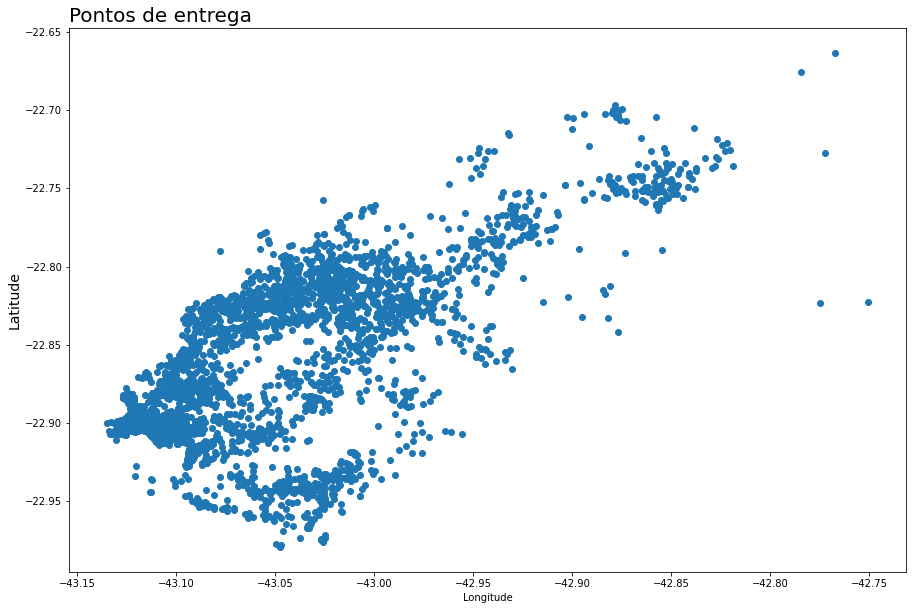

In [ ]:
import matplotlib.pyplot as plt         # pacote para gráficos
plt.figure(figsize=(15,10))                   # tamanho da figura (largura, altura) em polegadas
plt.scatter(df_entregas['longitude'],df_entregas['latitude'])
plt.xlabel('Longitude')                         # Nomeando os eixos
plt.ylabel('Latitude', fontsize = 14)           # Pode mudar o tamanho da fonte dos eixos
plt.title('Pontos de entrega', fontsize = 20 , loc = "left" ,color = "black")     # Pode mudar a cor, a localização do título

2 - Gráfico mais aprimorado + adicionando a localização da origem

Text(-43.09241355213128, -22.87080306092701, 'Origem')

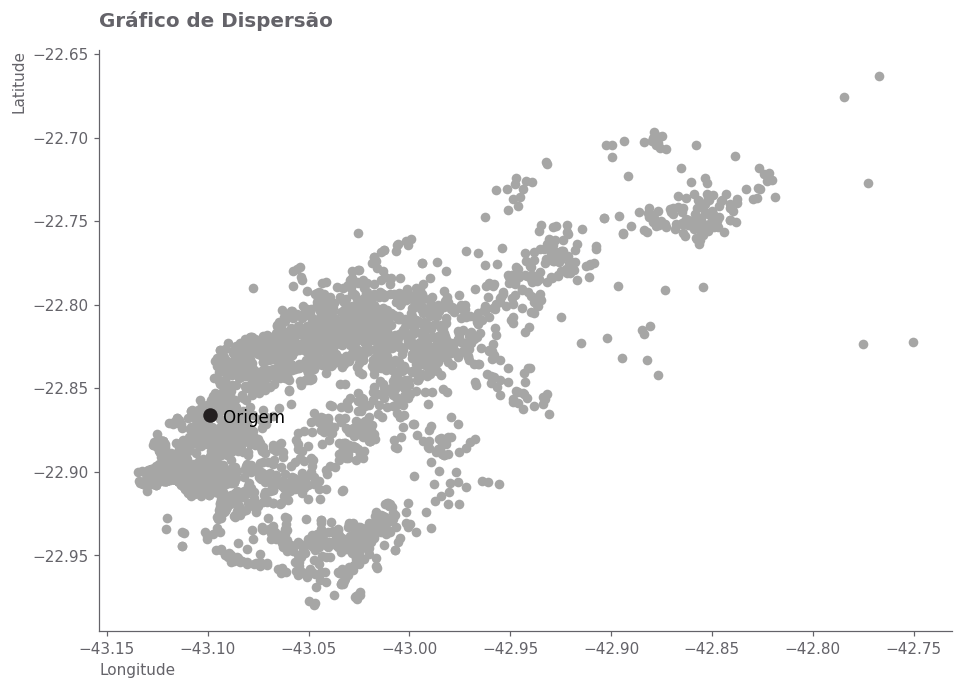

In [ ]:
# 1 - Importando as Bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Gráfico de Dispersão  (Scatterplot)

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# 2 - Plot
# Gráfico de dispersão - total_bill (x), tip (y) de df1 
sns.scatterplot(data = df_entregas, x="longitude", y="latitude", s = 40, linewidth = 0, color = '#A6A6A5' , ax = ax)    # cor opcional


# 3 - Título
# Inserindo título no nosso eixo ax
ax.set_title('Gráfico de Dispersão', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')


# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# Modificar a cor dos tiques para cinza (colocar uma cor mais clara - chamar menos atenção):
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


# Remoção de eixos desnecessários (Closure):
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo

# Modificar o label
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

# Gráfico para traçar a posição da origem (longitude e latitude do depósito):
sns.scatterplot(x = [data['origin']['lng']], y = [data['origin']['lat']], s = 90, linewidth=0, color = '#231F20' , ax = ax)

# Texto para indicar que é a Origem:
ax.text(data['origin']['lng'] - 0.00015 * data['origin']['lng'],data['origin']['lat'] + 0.0002* data['origin']['lat'],'Origem',color='black', fontsize=11)

3 - Gráfico mais aprimorado, mas agora modificando o tamanho de acordo com a demanda

In [ ]:
df_entregas.head()

,id,size,latitude,longitude
0,8f6abd1e06bd7704feac404a445094e1,3,-22.863610,-43.108038
1,e394f05d92650ed1512dabaadc9295d5,8,-22.862208,-43.089975
2,40f1c2db50c9697c3c1254f89d007f60,1,-22.863521,-43.096145
3,630983abc40e566355d993a11fee0973,6,-22.855668,-43.094908
4,ec64e4ae52e564dddc9bb5f695223a,9,-22.863310,-43.099547


Text(0, 1, 'Latitude')

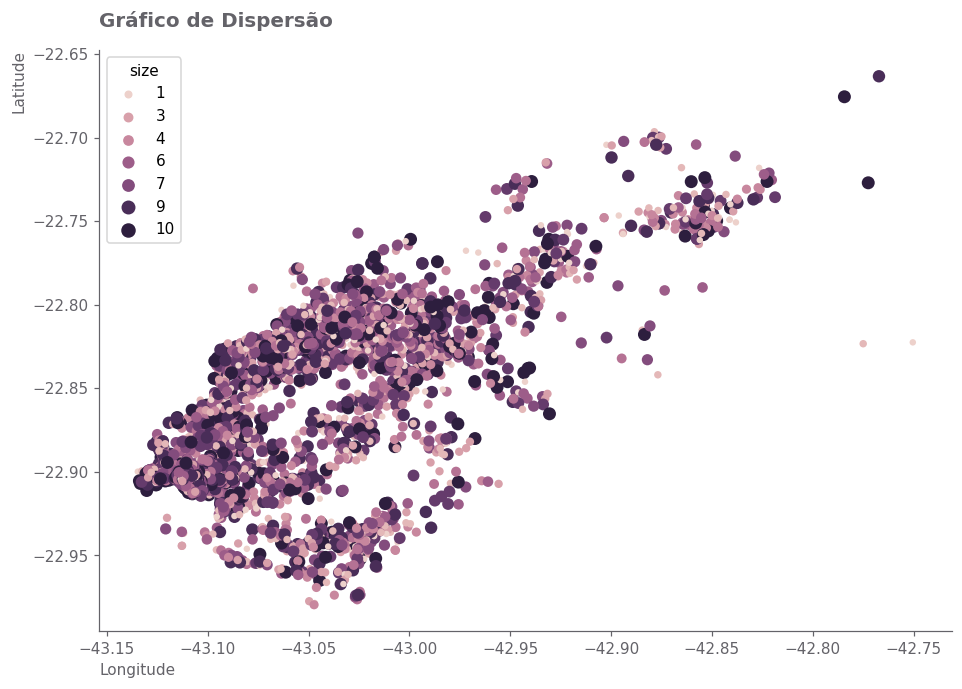

In [ ]:
# Importando as Bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão  (Scatterplot)

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# 2 - Plot
# Gráfico de dispersão - total_bill (x), tip (y) de df1 
sns.scatterplot(data = df_entregas, x="longitude", y="latitude",  linewidth = 0,  size="size", hue = 'size' , ax = ax)    # cor opcional


# 3 - Título
# Inserindo título no nosso eixo ax
ax.set_title('Gráfico de Dispersão', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')


# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# Modificar a cor dos tiques para cinza (colocar uma cor mais clara - chamar menos atenção):
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


# Remoção de eixos desnecessários (Closure):
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo

# Modificar o label
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

---
### 2.6 - Avaliando a demanda dos pontos

In [ ]:
df_entregas.head()

,id,size,latitude,longitude
0,8f6abd1e06bd7704feac404a445094e1,3,-22.863610,-43.108038
1,e394f05d92650ed1512dabaadc9295d5,8,-22.862208,-43.089975
2,40f1c2db50c9697c3c1254f89d007f60,1,-22.863521,-43.096145
3,630983abc40e566355d993a11fee0973,6,-22.855668,-43.094908
4,ec64e4ae52e564dddc9bb5f695223a,9,-22.863310,-43.099547


In [ ]:
# resumo estatístico de size
df_entregas['size'].describe()

count    3728.000000
mean        5.495440
std         2.867241
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: size, dtype: float64